In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

import joblib
import warnings
warnings.filterwarnings('ignore')

In [ ]:
iris = load_iris()
df = pd.DataFrame(data=iris.data,columns=iris.feature_names)
df['species'] = iris.target
df['species_name'] = df['species'].map(lambda i : iris.target_names[i])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [ ]:
print("Data Loaded")
print(df.shape)

Data Loaded
(150, 6)


In [ ]:
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species species_name  
0        0       setosa  
1        0       setosa  
2        0       setosa  
3        0       setosa  
4        0       setosa  


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
 5   species_name       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


In [ ]:
print(df.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)     species  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


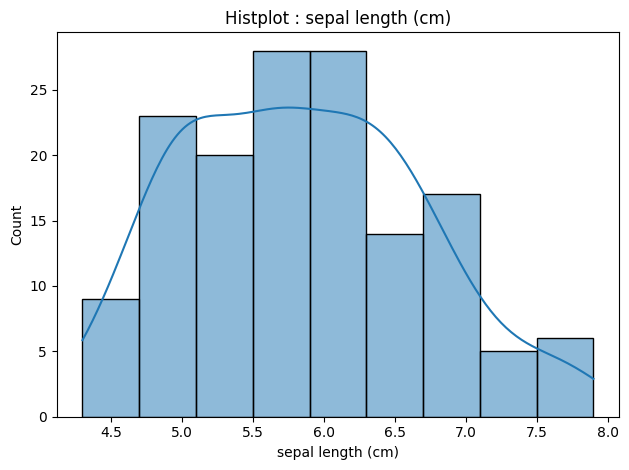

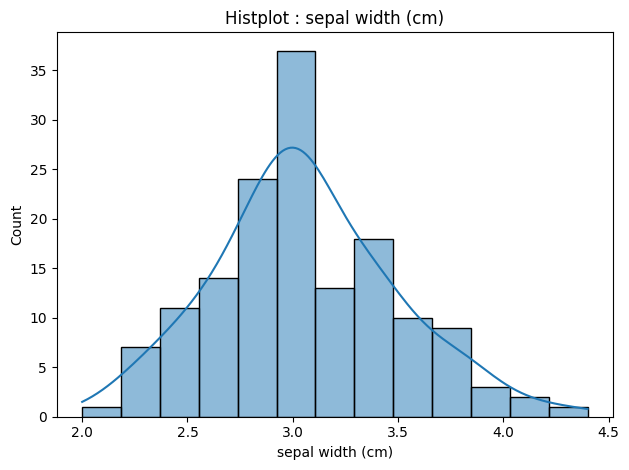

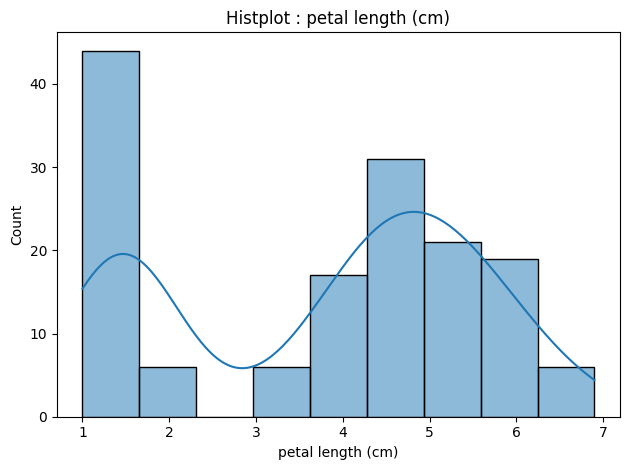

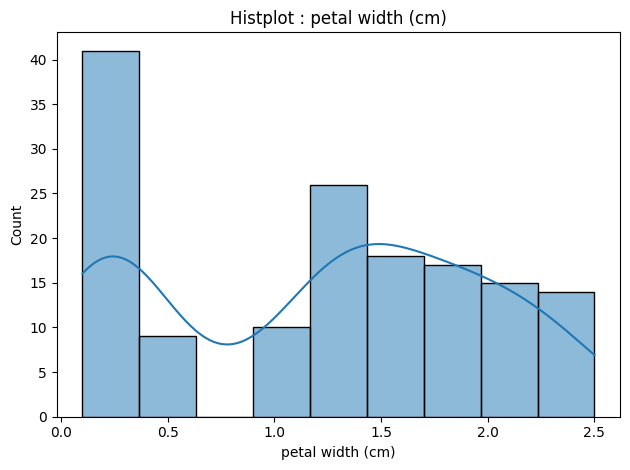

In [ ]:
for col in iris.feature_names:
  plt.figure()
  sns.histplot(data=df,x=col,kde=True)
  plt.title(f"Histplot : {col}")
  plt.tight_layout()
  plt.show()

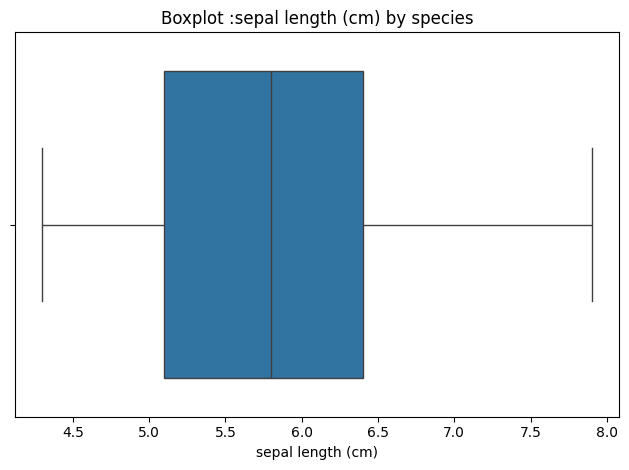

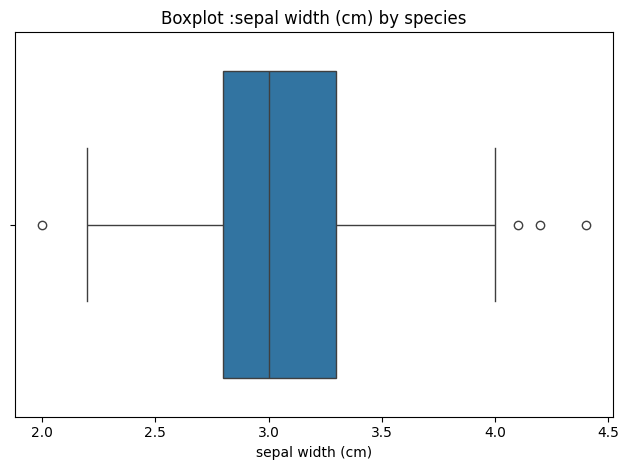

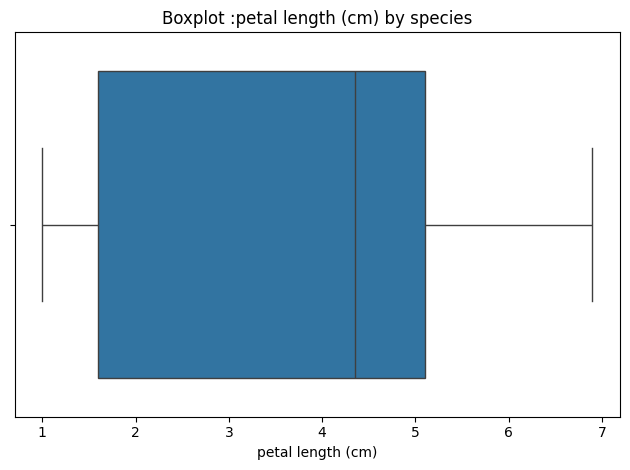

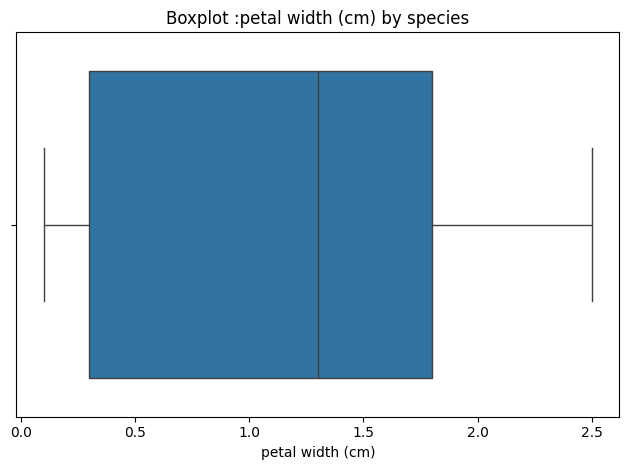

In [ ]:
for col in iris.feature_names:
  plt.figure
  sns.boxplot(data=df,x=col)
  plt.title(f"Boxplot :{col} by species")
  plt.tight_layout()
  plt.show()

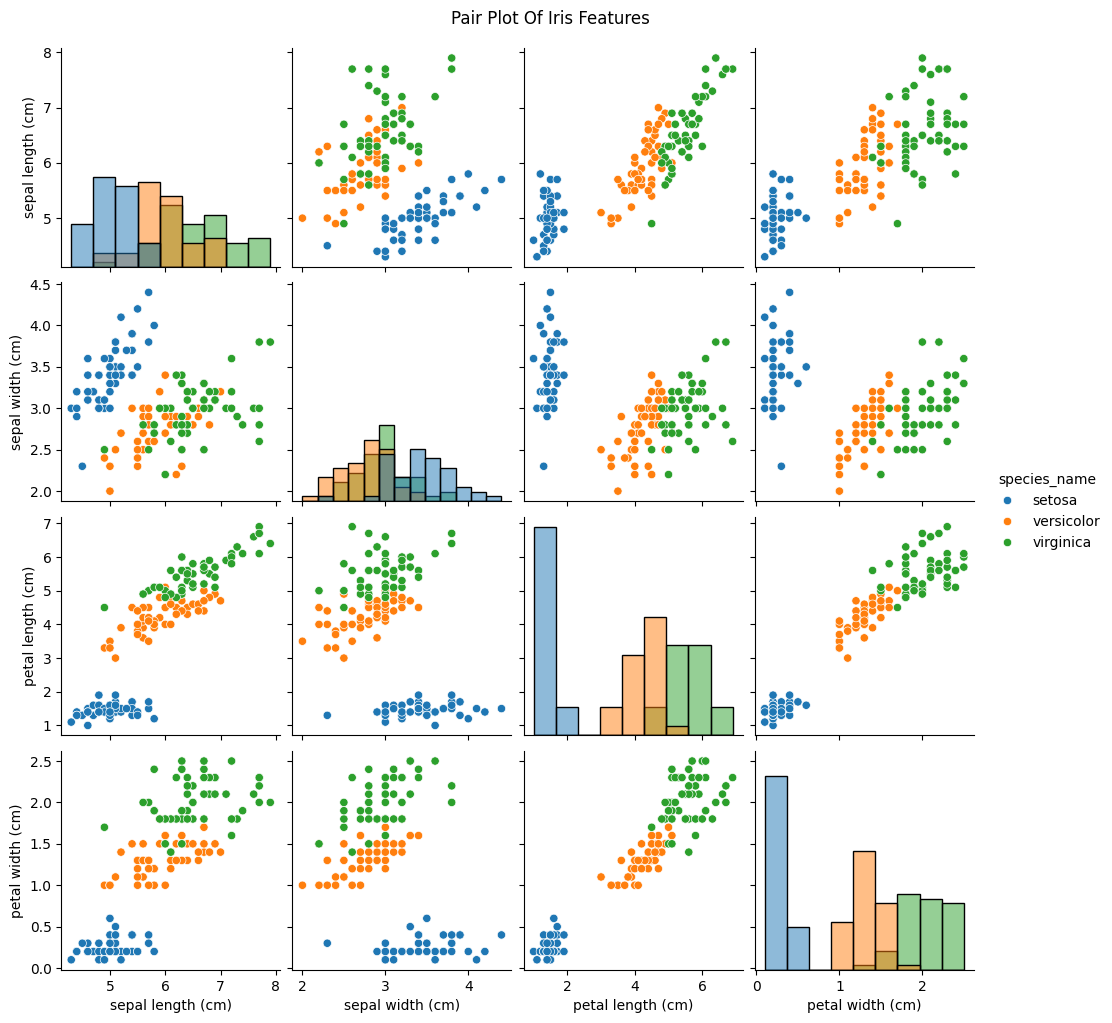

In [ ]:
sns.pairplot(df[iris.feature_names + ["species_name"]],hue="species_name",diag_kind="hist")
plt.suptitle("Pair Plot Of Iris Features",y=1.02)
plt.show()

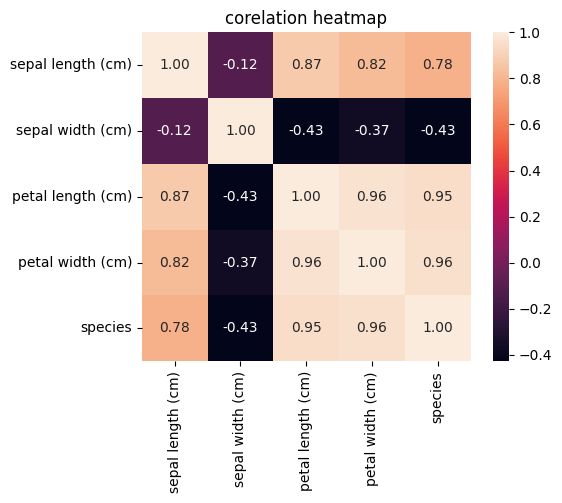

In [ ]:
plt.figure(figsize=(6,5))
sns.heatmap(df[iris.feature_names + ["species"]].corr(),annot=True,fmt=".2f",square=True)
plt.title("corelation heatmap")
plt.tight_layout()
plt.show()


In [ ]:
x = df[iris.feature_names].copy()
y = df["species"].copy()

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42,stratify=y)
print("\nsplit",x_train.shape,x_test.shape)


split (120, 4) (30, 4)


In [ ]:
from sklearn.linear_model import LogisticRegression

models = {
    "LogisticRegression" : Pipeline([
        ("scaler",StandardScaler()),
        ("clf",LogisticRegression(max_iter=500,random_state=42))
    ]),
    "KNN" : Pipeline([
        ("scaler",StandardScaler()),
        ("clf",KNeighborsClassifier(n_neighbors=5))

    ]),
    "DecisionTree" : DecisionTreeClassifier(random_state=42),
    "RandomForest" :RandomForestClassifier(n_estimators=200,random_state=42),
    "SVC-RBF" : Pipeline([
        ("scaler",StandardScaler()),
        ("clf",SVC(kernel='rbf',probability=True,random_state=42))
    ]),

}

In [ ]:
results = []
fitted_models = {}
for name,model in models.items():
  model.fit(x_train,y_train)
  fitted_models[name] = model
  pred = model.predict(x_test)
  acc = accuracy_score(y_test,pred)
  results.append((name,acc))
  print(f"\n=== {name} ===")
  print("Accuracy : ",round(acc,4))
  print("Classfication Report:\n",classification_report(y_test,pred,target_names=iris.target_names))


=== LogisticRegression ===
Accuracy :  0.9333
Classfication Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30


=== KNN ===
Accuracy :  0.9333
Classfication Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30


=== DecisionTree ===
Accuracy :  0.9333
Classfication Report:
               precision    recall  f1-score   sup

In [ ]:
results_sorted = sorted(results,key=lambda x:x[1],reverse=True)
best_name,best_acc = results_sorted[0]
best_model = fitted_models[best_name]

print("\n=========================")
print("Best Model",best_name)
print("Best Accuracy",round(best_acc,4))
print("===========================")


Best Model SVC-RBF
Best Accuracy 0.9667


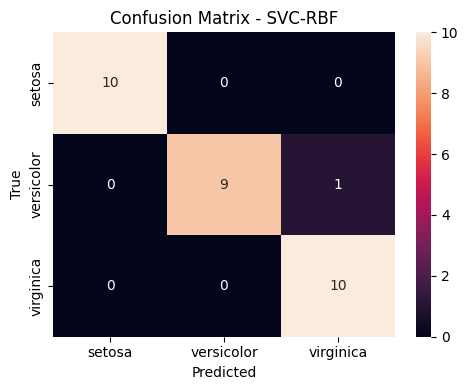

In [ ]:
best_pred = best_model.predict(x_test)
cm = confusion_matrix(y_test,best_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm,annot=True,fmt='d',xticklabels=iris.target_names,yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title(f"Confusion Matrix - {best_name}")
plt.tight_layout()
plt.show()

In [ ]:
joblib.dump(best_model,"iris best model.joblib")
print("\nSave best model to iris best model.joblib")


Save best model to iris best model.joblib


In [ ]:
new_sample = np.array([[5.1,3.5,1.4,0.2]])
pred_class = best_model.predict(new_sample)[0]
pred_name = iris.target_names[pred_class]
print("\n New Sample Prediction : ",pred_name)


 New Sample Prediction :  setosa
